In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
import pandas

In [6]:
df = pandas.read_csv("wine.csv")

In [9]:
print(df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  sugar  
0      9.4        5   red   0.68  
1      9.8      

In [10]:
print(df.tail())

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  sugar  
6492     11

In [11]:
print(df.shape)

(6497, 14)


In [14]:
colonnes = df.columns
print("Noms des colonnes :", colonnes)

lignes = df.index
print("Lignes (index) :", lignes)

valeurs = df.values
print("Valeurs de la DataFrame :\n", valeurs)

Noms des colonnes : Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'sugar'],
      dtype='object')
Lignes (index) : RangeIndex(start=0, stop=6497, step=1)
Valeurs de la DataFrame :
 [[7.4 0.7 0.0 ... 5 'red' 0.68]
 [7.8 0.88 0.0 ... 5 'red' 0.15]
 [7.8 0.76 0.04 ... 5 'red' 0.49]
 ...
 [6.5 0.24 0.19 ... 6 'white' nan]
 [5.5 0.29 0.3 ... 7 'white' 0.46]
 [6.0 0.21 0.38 ... 6 'white' 0.24]]


In [15]:
details_statistiques = df.describe()
print(details_statistiques)

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [16]:
# Compter le nombre de lignes avec des NaN
nombre_lignes_nan = df.isna().sum(axis=1)

print("Nombre de lignes avec des NaN :", nombre_lignes_nan.sum())

Nombre de lignes avec des NaN : 1704


In [18]:
# Colomn avec NAN 
colonnes_avec_nan = df.columns[df.isna().any()]

print("Colonnes avec des NaN :", colonnes_avec_nan)

Colonnes avec des NaN : Index(['sugar'], dtype='object')


In [19]:
# Compter le nombre de doublons
nombre_doublons = df.duplicated().sum()

print("Nombre de doublons :", nombre_doublons)

Nombre de doublons : 97


In [20]:
colonne_color = df['color']
print(colonne_color)

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6497, dtype: object


In [21]:
colonne_color = df['color'][4:]
print(colonne_color)

4         red
5         red
6         red
7         red
8         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: color, Length: 6493, dtype: object


In [22]:
colonnes = df.iloc[:, 2:5].head(2)
print(colonnes)

   citric_acid  residual_sugar  chlorides
0          0.0             1.9      0.076
1          0.0             2.6      0.098


In [23]:
# NAN to 0 
df = df.fillna(0)

In [24]:
# delete "sugar"
df = df.drop(columns='sugar')

In [29]:
sulphates = df[df['sulphates'] > 0.64]
print(sulphates['sulphates'])

1       0.68
2       0.65
9       0.80
11      0.80
13      1.56
        ... 
6418    0.67
6426    0.76
6451    0.73
6485    1.08
6486    0.79
Name: sulphates, Length: 1123, dtype: float64


In [28]:
print(df['sulphates'])

0       0.56
1       0.68
2       0.65
3       0.58
4       0.56
        ... 
6492    0.50
6493    0.46
6494    0.46
6495    0.38
6496    0.32
Name: sulphates, Length: 6497, dtype: float64


In [39]:
df = df.sort_values(by='chlorides', ascending=False)
df = df.reset_index(drop=True)
print(df['chlorides'])

0       0.611
1       0.610
2       0.467
3       0.464
4       0.422
        ...  
6492    0.013
6493    0.012
6494    0.012
6495    0.012
6496    0.009
Name: chlorides, Length: 6497, dtype: float64


In [37]:
def map_color(color):
    if color == 'red':
        return 0
    elif color == 'white':
        return 1
    else:
        return color

In [40]:
df['color'] = df['color'].map(map_color)

In [41]:
print(df['color'])

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    0
6494    0
6495    1
6496    1
Name: color, Length: 6497, dtype: int64


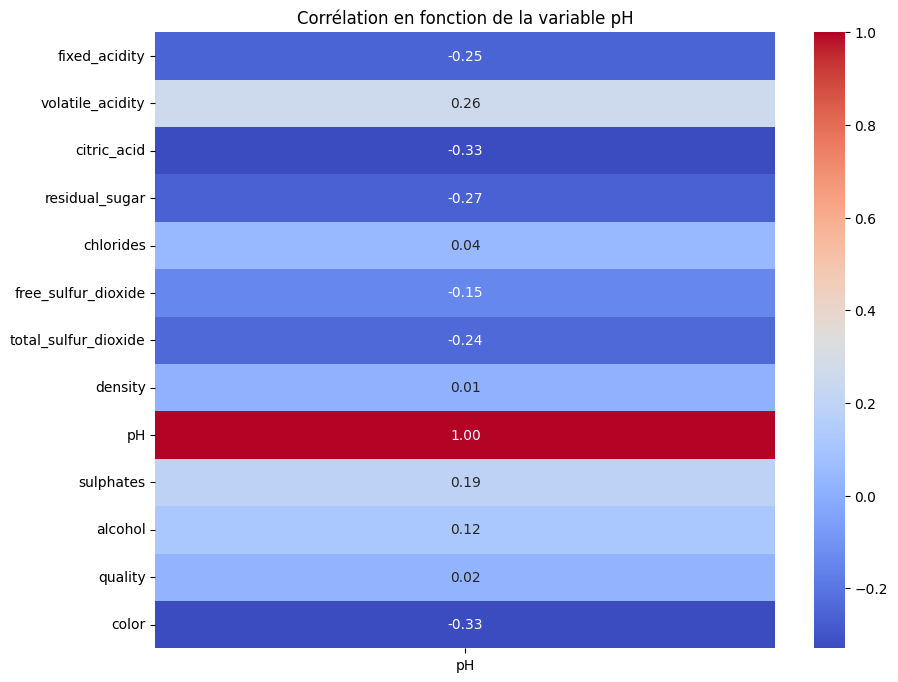

In [45]:
matrice_correlation = df.corr()

correlation_pH = matrice_correlation['pH']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pH.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Corrélation en fonction de la variable pH')
plt.show()

In [46]:
#Les tons de bleu indiquent une corrélation négative (valeurs proches de -1).
#Les tons de rouge indiquent une corrélation positive (valeurs proches de 1).
#Les couleurs plus proches du blanc indiquent une corrélation plus faible (valeurs proches de 0).

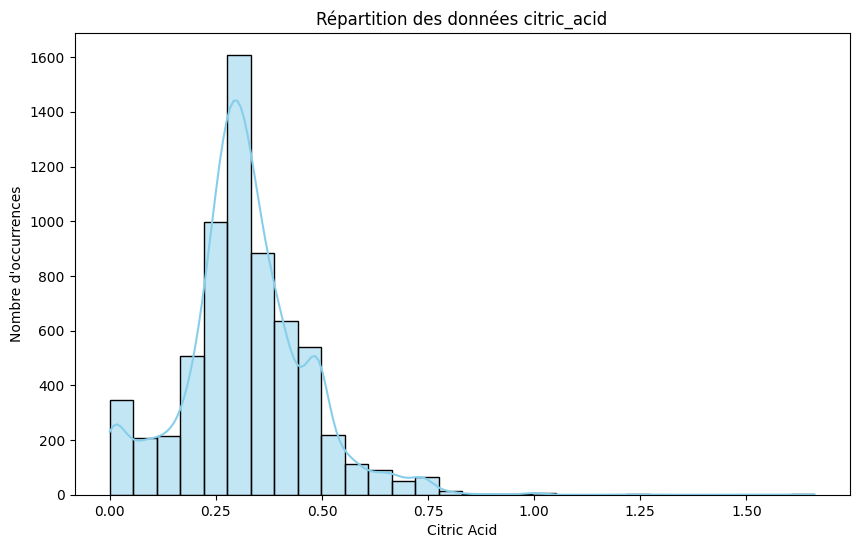

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['citric_acid'], bins=30, color='skyblue')
plt.title('Répartition des données citric_acid')
plt.xlabel('Citric Acid')
plt.ylabel('Nombre d\'occurrences')
plt.show()

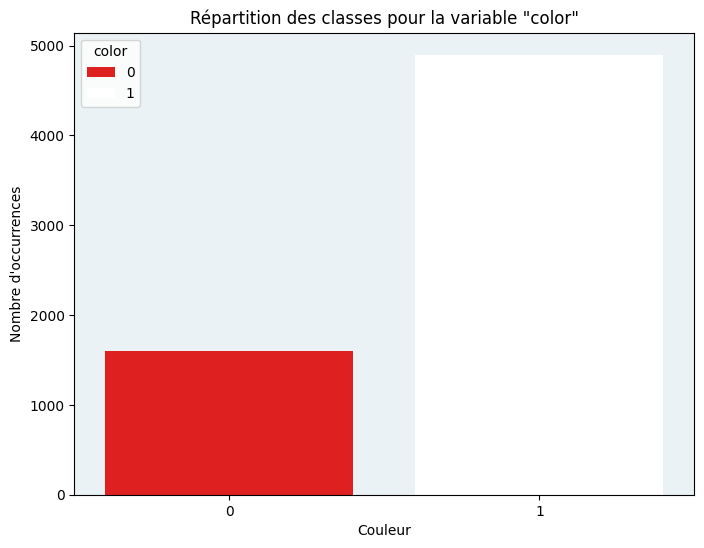

In [75]:
nombre_par_classe = df['color'].value_counts()
palette_couleurs = {0: 'red', 1: 'white'}
plt.figure(figsize=(8, 6))
sns.countplot(x='color', hue='color', data=df, palette=palette_couleurs)
plt.title('Répartition des classes pour la variable "color"')
plt.xlabel('Couleur')
plt.ylabel('Nombre d\'occurrences')
plt.gca().set_facecolor('#eaf2f5')
#for i, count in enumerate(nombre_par_classe):
#    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

In [65]:
# (80% pour l'entraînement, 20% pour le test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", df_train.shape)
print("Dimensions de l'ensemble de test :", df_test.shape)

Dimensions de l'ensemble d'entraînement : (5197, 13)
Dimensions de l'ensemble de test : (1300, 13)


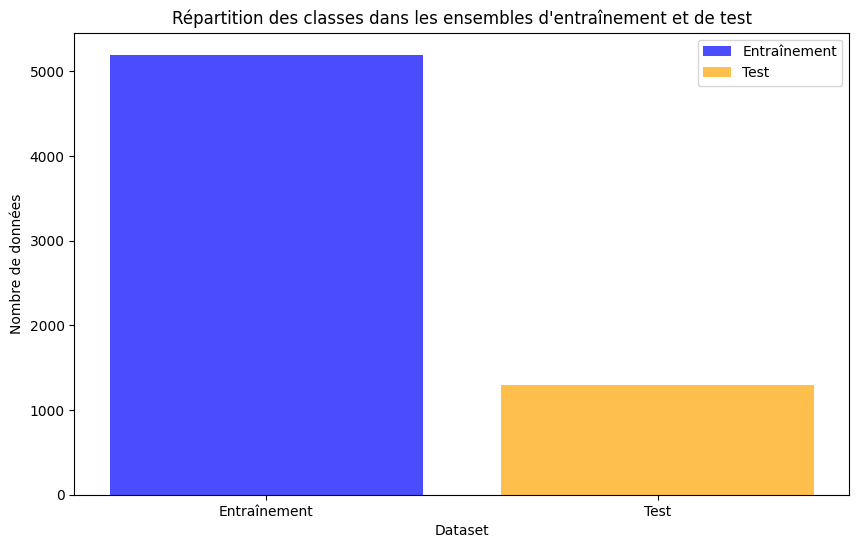

In [82]:
plt.figure(figsize=(10, 6))

plt.bar('Entraînement', df_train.shape[0], color='blue', alpha=0.7, label='Entraînement')

plt.bar('Test', df_test.shape[0], color='orange', alpha=0.7, label='Test')

plt.title('Répartition des classes dans les ensembles d\'entraînement et de test')
plt.xlabel('Dataset')
plt.ylabel('Nombre de données')
plt.legend()
plt.show()
